In [1]:
from fermipy.gtanalysis import GTAnalysis
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import xlrd
from scipy.stats import norm

In [2]:
!cat six_months.xlsx

�no��M,8�c%j��$%��e���dR���\F�j��}�:xOj1Ġ�3�tT��y{���zQ���Z�J��ՊX�\y�f3���l�Ę@��qeL����                                                                                                                                                                                                                                                                                                                                                                                                                                                                         �T�N1����^
�u_H�+U�FM�ZL�bn�`ȷ�̈́軤g5�:���L��(�ka�$}�nA�<8"��;A�ZQ�E��U��C\���{YqP�qC�뙠`,��    ! ��s�       xl/workbook.xml�U]o�8}_i����@MG!m�Ψ�t���S� fm�$���5��݌F��H��?8>��s���]SOTH�۹��lӠm��>��o3��T�-H�[:7�T��.���|���� ����R]lY2�hC��h+%                                                                                                                                                                         

In [3]:
df = pd.read_excel("six_months.xlsx")
#df = pd.DataFrame(df, columns= ['name','start'])
#df = pd.DataFrame(df, index_col = 3,)
print(df)


    config  finish                     name  files  PH file  start MET  \
0        1     1.0  L211113145812F817CF4953      3        2  266544002   
1        2     1.0  L211113145911F817CF4921      3        2  267753602   
2        3     1.0  L211113133513F817CF4987      3        2  272592002   
3        4     1.0  L211113133633F817CF4941      3        2  289353602   
4        5     1.0  L211113133941F817CF4904      3        2  290995202   
5        6     1.0  L211113134049F817CF4943      3        2  293760002   
6        7     1.0  L211113134160F817CF4968      3        2  296179202   
7        8     1.0  L211113134747F817CF4996      3        2  300499202   
8        9     1.0  L211113134413F817CF4971      3        2  306201602   
9       10     1.0  L211113134503F817CF4947      3        2  311904002   
10      11     1.0  L211113134905F817CF4978      3        2  324604802   
11      12     1.0  L211113134950F817CF4981      3        2  340329602   
12      13     1.0  L211113135127F817C

In [4]:
name = df['name'].tolist()
name

['L211113145812F817CF4953',
 'L211113145911F817CF4921',
 'L211113133513F817CF4987',
 'L211113133633F817CF4941',
 'L211113133941F817CF4904',
 'L211113134049F817CF4943',
 'L211113134160F817CF4968',
 'L211113134747F817CF4996',
 'L211113134413F817CF4971',
 'L211113134503F817CF4947',
 'L211113134905F817CF4978',
 'L211113134950F817CF4981',
 'L211113135127F817CF4962',
 'L211113135324F817CF4934',
 'L211113135553F817CF4964',
 'L211113135750F817CF4948',
 'L211113142039F817CF4960',
 'L211113140246F817CF4917',
 'L211113140402F817CF4968',
 'L211113140534F817CF4933',
 'L211113140637F817CF4983',
 'L211113140741F817CF4931',
 'L211113140844F817CF4920',
 'L211113141017F817CF4953',
 'L211113141114F817CF4929',
 'L211113142204F817CF4952',
 'L211113142415F817CF4972',
 'L211113142560F817CF4931',
 'L211113142725F817CF4923',
 'L211113142910F817CF4962',
 'L211113143034F817CF4990',
 'L211113143156F817CF4933',
 'L211113143318F817CF4905',
 'L211113143409F817CF4984',
 'L211113143511F817CF4944',
 'L211113143559F817C

In [5]:
type(name)

list

In [6]:
len(name)

50

In [7]:
start = df['start']
start = start.apply(lambda x: x.strftime('%Y-%m-%d'))

In [8]:
start

0     2009-06-13
1     2009-06-27
2     2009-08-22
3     2010-03-04
4     2010-03-23
5     2010-04-24
6     2010-05-22
7     2010-07-11
8     2010-09-15
9     2010-11-20
10    2011-04-16
11    2011-10-15
12    2012-01-09
13    2012-05-24
14    2012-09-24
15    2013-01-09
16    2013-02-19
17    2013-10-02
18    2013-11-15
19    2013-12-26
20    2014-01-09
21    2014-02-18
22    2014-04-20
23    2014-05-28
24    2014-06-07
25    2014-12-13
26    2015-02-07
27    2015-03-30
28    2016-01-02
29    2016-03-23
30    2016-04-06
31    2016-06-06
32    2016-07-28
33    2016-08-08
34    2016-09-18
35    2016-10-29
36    2016-11-28
37    2017-08-05
38    2017-11-05
39    2018-03-30
40    2018-06-26
41    2018-07-04
42    2018-11-10
43    2019-05-08
44    2020-02-17
45    2020-03-20
46    2020-06-20
47    2020-08-20
48    2021-03-20
49    2021-04-10
Name: start, dtype: object

In [9]:
dt = np.dtype('U25')
x = np.zeros((50, 2),dtype= dt)
x[:,0] = range(1,51)
x[:,1] = name
x

array([['1', 'L211113145812F817CF4953'],
       ['2', 'L211113145911F817CF4921'],
       ['3', 'L211113133513F817CF4987'],
       ['4', 'L211113133633F817CF4941'],
       ['5', 'L211113133941F817CF4904'],
       ['6', 'L211113134049F817CF4943'],
       ['7', 'L211113134160F817CF4968'],
       ['8', 'L211113134747F817CF4996'],
       ['9', 'L211113134413F817CF4971'],
       ['10', 'L211113134503F817CF4947'],
       ['11', 'L211113134905F817CF4978'],
       ['12', 'L211113134950F817CF4981'],
       ['13', 'L211113135127F817CF4962'],
       ['14', 'L211113135324F817CF4934'],
       ['15', 'L211113135553F817CF4964'],
       ['16', 'L211113135750F817CF4948'],
       ['17', 'L211113142039F817CF4960'],
       ['18', 'L211113140246F817CF4917'],
       ['19', 'L211113140402F817CF4968'],
       ['20', 'L211113140534F817CF4933'],
       ['21', 'L211113140637F817CF4983'],
       ['22', 'L211113140741F817CF4931'],
       ['23', 'L211113140844F817CF4920'],
       ['24', 'L211113141017F817CF4953'],
 

In [10]:
#raw data 
for i,k in zip(range(1,51),name):
    for j in range(1,3):
        exec("rawdata%s_%s = fits.open('data/%s_PH0%s.fits')" %(i,j,k,j-1)) 
    

In [11]:
rawdata50_2

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f0dd23880d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f0dd2338350>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f0dd233c4d0>]

In [12]:
#table of raw data 
for i in range(1,51):
    for j in range(1,3):
        exec("t_rawdata%s_%s = Table(rawdata%s_%s[1].data)" %(i,j,i,j))
   
      

In [13]:
rawz1_1 = t_rawdata1_1['ENERGY']


In [14]:
for i in range(1,51):
    for j in range(1,3):
        exec("rawz%s_%s = t_rawdata%s_%s['ENERGY']" %(i,j,i,j))
    exec("rawz%s = np.concatenate((rawz%s_1,rawz%s_2))" %(i,i,i))
  

In [15]:
rawz50

array([ 593.9514 ,  216.86147, 2191.5198 , ...,  315.6696 ,  761.88666,
        734.39905], dtype=float32)

In [16]:
N_rawdata = []
for i in range(1,51):
    exec('N_rawdata.append(len(rawz%s))'%i)

In [17]:
N_rawdata

[44452,
 44444,
 42267,
 44028,
 43800,
 40726,
 40470,
 39945,
 39980,
 55295,
 43595,
 43166,
 46252,
 42359,
 40336,
 44059,
 51821,
 55123,
 59505,
 57873,
 55492,
 54671,
 57135,
 62555,
 64744,
 46693,
 46072,
 41885,
 54787,
 52233,
 51998,
 48094,
 62179,
 62679,
 63146,
 63021,
 59430,
 39326,
 32025,
 38129,
 45781,
 47947,
 52604,
 39799,
 44098,
 41975,
 41341,
 43860,
 42905,
 42245]

In [18]:
for i in range(1,51):
    exec("filtered%s = fits.open('Output/Output_config%s/ft1_00.fits')" % (i,i) )

In [ ]:
for i in range(1,51):
    exec("t_filtered%s = Table(filtered%s[1].data)" %(i,i))

In [ ]:
for i in range(1,51):
    exec('filteredz%s = t_filtered%s["ENERGY"]' %(i,i))

In [ ]:
N_filtereddata = []
for i in range(1,51):
    exec('np.array(N_filtereddata.append(len(filteredz%s)))'%i)

In [ ]:
N_rawdata

In [23]:
N_filtereddata

[31918,
 31918,
 29542,
 28744,
 29191,
 28899,
 29131,
 29232,
 28855,
 29823,
 27374,
 29238,
 30259,
 27152,
 26767,
 29629,
 30511,
 38869,
 41568,
 40298,
 39120,
 38033,
 40293,
 43413,
 45363,
 33244,
 32944,
 29645,
 31622,
 30077,
 29150,
 31230,
 31091,
 31932,
 32126,
 31813,
 29835,
 28127,
 21613,
 27025,
 32134,
 33888,
 36371,
 29111,
 30877,
 30802,
 29904,
 32048,
 30976,
 30918]

In [ ]:
#dates
start

In [ ]:
#start 

In [ ]:
#statistics
#raw data
mean = np.average(N_rawdata)
mean = np.around(mean,2)
print('the mean of rawdata is', mean)
std = np.std(N_rawdata)
std = np.around(std,2)
print('the standard deviation of rawdata is', std)
median = np.median(N_rawdata)
median = np.around(median,2)
print('the median of rawdata is', median)

In [ ]:
#statistics
#filtered data
mean1 = np.average(N_filtereddata)
mean1 = np.around(mean1,2)
print('the mean of filtered data is', mean1)
std1 = np.std(N_filtereddata)
std1 = np.around(std1,2)
print('the standard deviation of filtered data is', std1)
median1 = np.median(N_filtereddata)
median1 = np.around(median1,2)
print('the median of filtered data is', median1)

In [ ]:
np.sum(N_rawdata)

In [ ]:
#making raw data's bar plot
fig, ax = plt.subplots(figsize=(50,20))
ax.bar(start, N_rawdata,width = 0.8) 
ax.set_xlabel("Start dates (183 days)",fontsize=50)
ax.set_ylabel("Number of events (counts)",fontsize=50)
ax.legend(["$\mu$ = %.2f\n $\sigma$ = %.2f\n median = %.2f" % (mean, std,median)], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=1.5, c='black')
ax.set_ylim(0,70000)
ax.set_xticklabels(start,rotation=45,ha='right')
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Distribution of raw data in 6 months',fontsize = 80)

In [ ]:
#making filtered data's bar plot
#statistics
#making raw data's bar plot

fig, ax = plt.subplots(figsize=(50,20))
ax.bar(start, N_filtereddata,width = 0.8) 

ax.set_xlabel("Start dates (183 day)",fontsize=50)
ax.set_ylabel("Number of events (counts)",fontsize=50)
ax.legend(["$\mu$ = %.2f\n $\sigma$ = %.2f\n median = %.2f" % (mean1, std1,median1)], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=1.5, c='black')
ax.set_ylim(0,70000)
ax.set_xticklabels(start,rotation=45,ha='right')
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Distribution of filtered data in 6 months',fontsize = 80)

In [ ]:
N_rawdata

In [ ]:
from scipy.stats import norm

mean,std=norm.fit(N_rawdata)

fig, ax = plt.subplots(figsize=(50,20))
ax.hist(N_rawdata,bins=7,label="$\mu$ = %0.2f\n $\sigma$ = %0.2f\n median = %0.2f" % (mean, std,median),edgecolor='black')
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Frequency",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
ax.set_ylim(0,25)
ax.set_xlim(20000,70000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Frequency histogram of raw data collection',fontsize = 80)

In [ ]:
from scipy.stats import norm

mean,std=norm.fit(N_rawdata)

x = np.linspace(3000,70000)
y = norm.pdf(x, mean, std)

fig, ax = plt.subplots(figsize=(50,20))
pdf, bins, patches = ax.hist(N_rawdata,bins=7,density=True,edgecolor='black')
ax.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s\n median = %0.2f" % (np.around(mean,2), np.around(std,2),median))
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Density of probability",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,0.05)
ax.set_xlim(20000,70000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.offsetText.set_fontsize(40)
ax.set_title('Density of probability of raw data collection',fontsize = 80)
print('Check normalized to 1', np.sum(pdf * np.diff(bins)))

In [ ]:
from scipy.stats import norm

mean,std=norm.fit(N_filtereddata)

fig, ax = plt.subplots(figsize=(50,20))
ax.hist(N_filtereddata,bins=7,label="$\mu$ = %0.2f\n $\sigma$ = %0.2f\n median = %0.2f" % (mean1, std1,median1),edgecolor='black')
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Frequency",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,25)
ax.set_xlim(20000,70000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Frequency histogram of filtered data collection',fontsize = 80)

In [ ]:
mean,std=norm.fit(N_filtereddata)

x = np.linspace(20000,50000)
y = norm.pdf(x, mean, std)

fig, ax = plt.subplots(figsize=(50,20))
pdf, bins, patches = ax.hist(N_filtereddata,bins=7,density=True,edgecolor='black')
ax.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s\n median = %0.2f" % (np.around(mean,2), np.around(std,2),median1))
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Density of probability",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,0.05)
ax.set_xlim(20000,70000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.offsetText.set_fontsize(40)
ax.set_title('Density of probability of filtered data collection',fontsize = 80)
print('Check normalized to 1', np.sum(pdf * np.diff(bins)))

In [ ]:
x = np.linspace(100,350)
print(x)

In [ ]:
#Calculate bin
print(np.sum(N_rawdata))
print(np.sum(N_filtereddata))
print('bin size of raw data = ',1 + 3.322*np.log10(np.sum(N_rawdata)))
print('bin size of filtered data = ',1 + 3.322*np.log10(np.sum(N_filtereddata)))

In [ ]:
#raw data
for i in range(1,26):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 22)
    exec("ax1.hist(rawz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(1+(2*(i-1)),N_rawdata[(2*(i-1))]))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,12500)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(rawz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(2+(2*(i-1)),N_rawdata[1+(2*(i-1))]))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,12500)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")

    exec("plt.savefig('rawdata_his_map%s.png')" %i)

In [ ]:
#filtered data
for i in range(1,26):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 22)
    exec("ax1.hist(filteredz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(1+(2*(i-1)),N_filtereddata[(2*(i-1))]))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,7100)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('filtered data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(filteredz%s, bins = bin ,edgecolor='black',label = 'Total of photons = %s')" %(2+(2*(i-1)),N_filtereddata[1+(2*(i-1))]))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,7100)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('filtered data %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of filtered data collection',fontsize = 60, horizontalalignment = "center")


    exec("plt.savefig('filtereddata_his_map%s.png')" %i)

# complete

# complete

In [ ]:
#raw data
for i in range(1,26):
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+1))
    x = np.linspace(0,350000)
    y = norm.pdf(x, mean, std)
    
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(rawz%s, bins = bin,,edgecolor='black',label='Total number of photons = %s\n $\mu$ = %0.2f\n $\sigma$ = %0.2f' %(N_rawdata[1+(2*(i-1)),2*(i-1)),mean,std))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,11000)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(rawz%s, bins = bin,label = N_rawdata[%s])" %(2+(2*(i-1)),1+ 2*(i-1)))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,11000)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")


#    exec("plt.savefig('rawdata_his_map%s.png')" %i)


In [ ]:
1+1

In [ ]:
#raw data
for i in range(1,2):
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+1))
    x = np.linspace(0,350000)
    y = norm.pdf(x, mean, std)
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(rawz%s, bins = bin,label = N_rawdata[%s],density=True,edgecolor='black')" %(1+(2*(i-1)),2*(i-1)))
    exec('ax1.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s")' %(mean,std))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
#    ax1.set_ylim(0,55)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
         
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+2))
    y = norm.pdf(x, mean, std)
    exec("ax.hist(rawz%s, bins = bin,density=True,edgecolor='black',label = N_rawdata[%s])" %(2+(2*(i-1)),1+ 2*(i-1)))
    exec("ax.plot(x, y,label='%s,%s')" %(mean,std))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
#    ax.set_ylim(0,55)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")


#    exec("plt.savefig('rawdata_his_map%s.png')" %i)


In [ ]:
#raw data
for i in range(1,32):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(z%s, bins = bin,label = N_filtereddata[%s])" %(i,i-1))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,35)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('Distribution of filtered data collection',fontsize = 60)

    bin = 50
    exec("count, xedges, yedges = np.histogram2d(x%s, y%s, bins = bin)" %(i,i))
    count = ax.imshow(count.T, origin='lower',  cmap='inferno',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],vmin=0,vmax=5)
    ax.scatter((new_t['GLON'] +180)%360 - 180, new_t['GLAT'],edgecolor = 'white' , s=700 , facecolor='none')
    for j, txt in enumerate(new_t['Source_Name']):           
        ax.annotate(txt, (new_t['GLON'][j]+0.35, new_t['GLAT'][j]+0.05),fontsize=15,color='white')
    cbar = fig.colorbar(count, ax=ax,ticks=np.arange(0,6,1))
    cbar.set_label("counts in bins ( counts )",fontsize=50) 
    cbar.ax.tick_params(labelsize=40) 
    ax.set_title('Count of photons in a day',fontsize = 60)
    fig.suptitle('filtered data on %s'  %D_rawdata[i-1] ,fontsize = 60, horizontalalignment = "center")
    ax.set_xlabel("Galactic Longitude (deg)",fontsize=40)
    ax.set_ylabel("Galactic Latitude (deg)",fontsize=40)
    ax.set_xlim(53.5+3, 53.5-3)
    ax.set_ylim(0.3-3, 0.3+3)
    ax.grid(alpha=0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    exec("plt.savefig('filtered_data_his_map%s.png')" %i)


In [ ]:
from scipy.stats import norm

mean,std=norm.fit(z3)

x = np.linspace(100, 250, 2)
y = norm.pdf(x, mean, std)
plt.plot(x, y, label="$\mu$ = %0.2e\n $\sigma$ = %0.2e" % (mean, std), color='orange')

In [ ]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=1000)
#plt.hist(z2)
plt.hist(z13, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.xlim(0,4)
plt.show()

In [ ]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [ ]:
mean,std=norm.fit(z1)

x = np.linspace(0, 1000, 2)
y = norm.pdf(x, std, mean)
plt.plot(x, y, label="$\mu$ = %0.2e\n $\sigma$ = %0.2e" % (mean, std), color='orange')

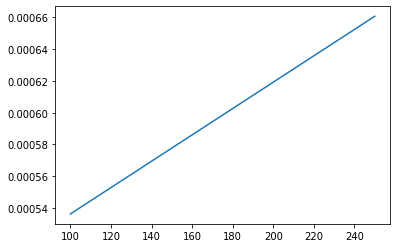

In [49]:
plt.plot(x,y)

In [47]:
z1

array([ 144.97873 ,  560.652   ,  119.38184 ,  103.46217 ,  275.7891  ,
       1605.3563  ,  168.36273 ,  372.96817 ,  147.79526 ,  139.35043 ,
        290.81073 ,  454.3052  ,  107.811005,  183.01239 ,  236.98866 ,
        676.2594  ,  254.94305 ,  890.56335 ,  657.4601  , 1767.0233  ,
        608.0484  ,  185.1111  ,  788.1335  , 2412.861   ,  421.6249  ,
       1917.4524  ,  241.60379 ,  487.59448 ,  558.5317  ,  206.89299 ,
        592.99243 ,  197.53654 ,  662.55975 ,  963.4103  ,  412.81317 ,
        486.27203 ,  348.86606 ,  422.424   ,  951.18335 ,  510.89822 ,
        218.6181  ,  328.7797  ,  320.06323 , 1328.5863  ,  275.2947  ,
        705.9798  ,  332.24405 ,  794.85205 ,  159.15442 ,  243.12718 ,
        442.98663 ,  535.27594 ,  103.84506 ,  570.8241  ,  125.92741 ,
        367.977   ,  159.39302 ,  563.23975 , 2507.7727  ,  709.02234 ,
        909.88153 , 2405.628   ,  897.30444 , 1672.8193  ,  138.92438 ,
        211.73021 ,  152.58356 ,  126.44306 ,  145.01009 ,  253.